"Geo Data Science with Python" 
### Notebook Lesson 8c

# Cluster Analysis

This lesson discusses examples of unsupervised learning through cluster analysis in Python.

### Sources

Brunton & Kutz, 2016 (see Syllabus for full reference), Chapter 5.

---

# k-means Clustering - Simple Example

First, we are importing necessary packages, including scipy and sklearn functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [6, 6]

### Generating random dataset for testing

Now, let's generate a random dataset of two clusters, on which we can experiment later with clustering algorithms. We start with a random point cloude (ellipse) centered at (0,0):

In [2]:
# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (0,0)
x = np.random.randn(n1+n2)
y = 0.5*np.random.randn(n1+n2)
x.shape

(150,)

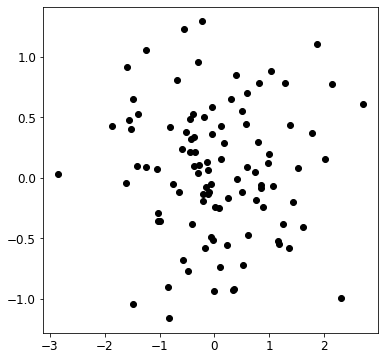

In [3]:
plt.figure()
plt.plot(x[:n1],y[:n1],'ko')
plt.show()

Now we generate a second data cloud (ellipse), that is also rotated:

In [4]:
# Random ellipse 2 centered at (1,-2)
x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

# Final rotated ellipse
x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

Now, shown below, we have generate data from two distinct Gaussian distributions. 

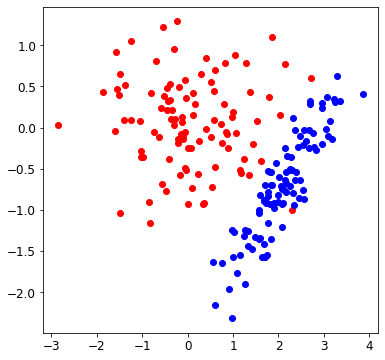

In [5]:
plt.figure()
plt.plot(x[:n1],y[:n1],'ro')
plt.plot(x3[:n1],y3[:n1],'bo')
plt.show()

### Splitting data for cross-validation

In this case, we have ground truth data to check the k-means clustering against. Note that in general, this is not the case. 

In [6]:
# Training set: first 2 x 100 
X1 = np.column_stack((x3[:n1],y3[:n1]))  # Cluster 1 (blue)
X2 = np.column_stack((x[:n1],y[:n1]))    # Cluster 2 (red)
Y = np.concatenate((X1,X2))                      # data vectors (x1 and x2 values)
Z = np.column_stack((np.ones(n1),2*np.ones(n1))) # labels


# Test set: remaining 2 x 50 points
x1test = np.column_stack((x3[n1:],y3[n1:]))   # test data set 1
x2test = np.column_stack((x[n1:],y[n1:]))     # test data set 2
ytest = np.concatenate((x1test,x2test))  
ztest = np.column_stack((np.ones(n2),2*np.ones(n2))) # test labels


### Tutorial 1: k-means clustering with Lloyd's algorithm

For Lloyd algorithm, the user guesses the number of clusters and the initial cluster means and then the algorithm proceeds to update them in an iterative fashion. k-means is sensitive to the initial guess and many modern versions of the algorithm also provide principled strategies for initialization.

Below an illustration of the k-means iteration procedure based upon Lloyd’s algorithm. Two clusters are sought so that k = 2. The initial guesses (black circles in panel (a)) are used to initially label all the data according to their distance from each initial guess for the mean. The means are then updated by computing the means of the newly labeled data. This two-stage heuristic converges after approximately four iterations.

Based on the code below, discuss the following questions: 
1) Which variable stores the (center coordinates of the cluster)?
2) What are the initial guesses for cluster center?
3) How are the labels realized in the code (and via which variables)?
4) Do the results change, when you change the number of iterations?


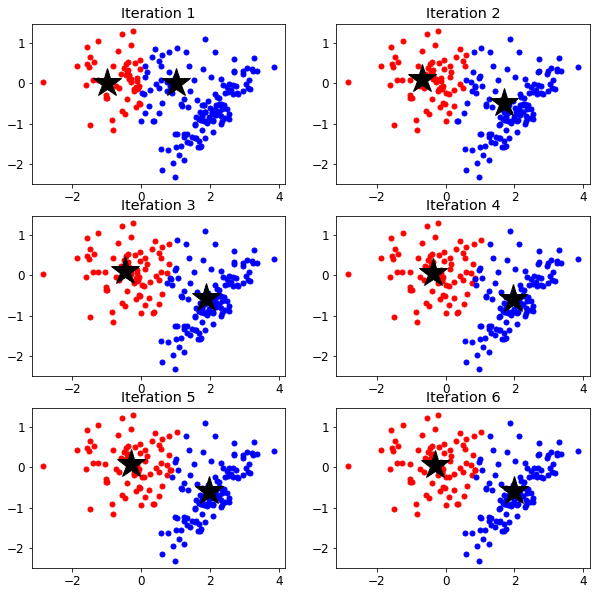

In [7]:
# Intitial guess: 2 cluster g1 and g2
g1 = np.array([-1, 0])   # Initial guess for k-mean for first cluster
g2 = np.array([1, 0])    # Initial guess for k-mean for second cluster

# Setting number of iterations
numIt = 6

# Preparing the plot
plt.rcParams['figure.figsize'] = [10, 10]
fig,axs = plt.subplots(int(np.ceil(numIt)/2),2)
axs = axs.reshape(-1)

# Iterative, heuristic Lloyd algorithm
for j in range(numIt):       # heuristic iterations
    class1 = np.zeros((1,2))
    class2 = np.zeros((1,2))
    for jj in range(Y.shape[0]):  # processing all training data
        d1 = np.linalg.norm(g1-Y[jj,:],ord=2) # distance to first k-mean
        d2 = np.linalg.norm(g2-Y[jj,:],ord=2) # distance to second k-mean
        
        # sort current point into cluster 1 or 2, depending on distance
        if d1<d2:
            class1 = np.append(class1,Y[jj,:].reshape((1,2)),axis=0)
        else:
            class2 = np.append(class2,Y[jj,:].reshape((1,2)),axis=0)
    
    class1 = np.delete(class1, (0), axis=0) # remove zeros used to initialize
    class2 = np.delete(class2, (0), axis=0)    
    
    # plot sorted points with different color per cluster into current subplot
    axs[j].plot(class1[:,0],class1[:,1],'ro',ms=5)
    axs[j].plot(class2[:,0],class2[:,1],'bo',ms=5)
    axs[j].plot(g1[0],g1[1],'k*',ms=30)
    axs[j].plot(g2[0],g2[1],'k*',ms=30)
    axs[j].title.set_text('Iteration ' + str(j+1))
    
    # Updating the k-means
    g1 = np.array([np.mean(class1[:,0]),np.mean(class1[:,1])])
    g2 = np.array([np.mean(class2[:,0]),np.mean(class2[:,1])])    
    
plt.show()


### Tutorial 2: Track the convergence of the algorithm

#### 2.a) Use the code from above and expand the code to calculate the within-cluster sum of squares for each iteration. 

In [8]:

### ADD YOUR CODE HERE








#### 2.b) Now make a plot of the sum of squares per number of iteration. At which iteration does the algorithm converge?

In [9]:

### ADD YOUR CODE HERE





### Tutorial 3: k-means clustering with sklearn & it's properties

The package  `sklearn.cluster` provides a `k-means` **class** that can solve the problem using either Lloyd’s or Elkan’s algorithm. Inspect the code below how to use it.


In [10]:
from sklearn.cluster import KMeans

# kmeans code
kmeans = KMeans(n_clusters=2, random_state=0).fit(Y)  # Compute k-means clustering.
c = kmeans.cluster_centers_

Now let's look at the difference between sklearn k-means and Loyd's algorithm a after 4 iterations (results from previous section). 

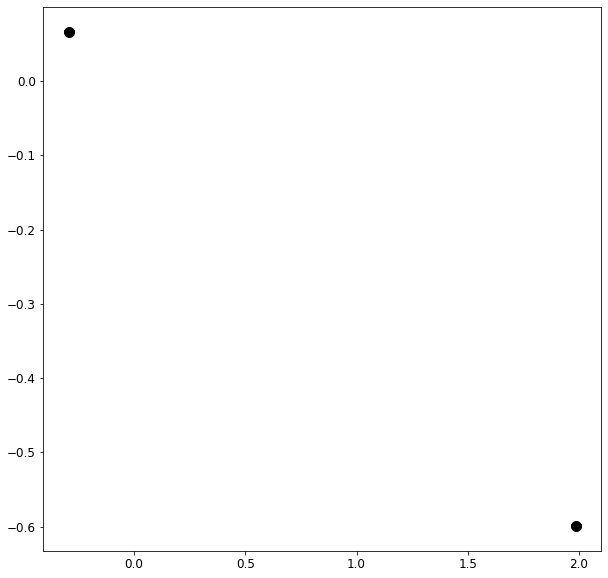

In [11]:
# result from previous section
plt.plot(g1[0],g1[1],'ko',ms=10)
plt.plot(g2[0],g2[1],'ko',ms=10)

# kmeans result
plt.plot(c[0,0],c[0,1],'k*',ms=10)
plt.plot(c[1,0],c[1,1],'k*',ms=10)

plt.show()


### Apply kmeans class attibutes to answer the following questions

For that, find more details on attibutes of the class `sklearn.cluster.KMeans` on the document pages: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

- How many cluster centers do you get and what are their values?
- Which algorithm is used, if not specified?
- How do you retrieve the labels, and what are they?
- How many iterations did the algorithm run?
- How can you retrieve sum of squared distances?
- What information is stored in `n_features_in_`?

In [12]:

### ADD YOUR CODE BELOW


#How many cluster centers do you get and what are their values?


#Which algorithm is used, if not specified?


#How do you retrieve the labels, and what are they?


#How many iterations did the algorithm run?


#How can you retrieve sum of squared distances?


#What information is stored in `n_features_in_`?: Number of features seen during fit.



### Tutorial 4: Checking the accuracy of the results

Now, since these are artifically generated data cluster, we can check or validate the results with known input (note, this is usually not possible when working with real data).

We can do this for the training dataset and for the test dataset.

#### a) Check results for training dataset

In [13]:

### ADD YOUR CODE HERE



#### b) Check results for test dataset

In [14]:

### ADD YOUR CODE HERE



### Decision line

Below, the training data is used to produce a decision line (black line) separating the clusters (subplot 1). (The line can be found based on the slope between the two cluster points). Note that the line is clearly not optimal. The classification line can then be used on withheld data to test the accuracy of the algorithm (subplot 2). For the test data, one (of 50) magenta ball would be mislabeled while six (of 50) green balls are mislabeled. 

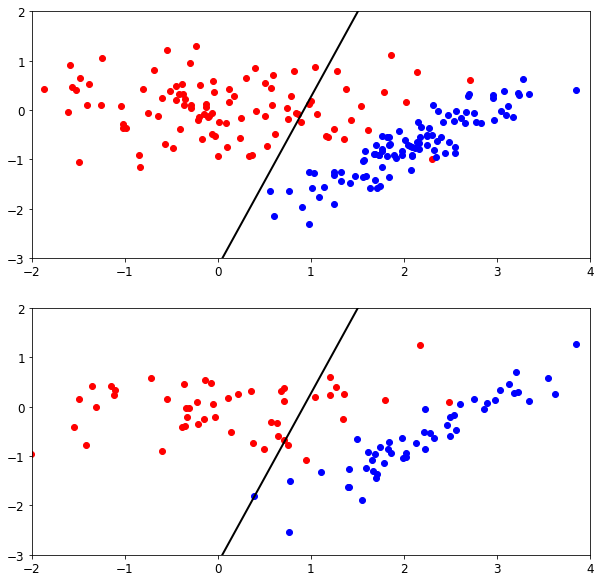

In [15]:
# Finding & creating the decision line
midx = (c[0,0]+c[1,0])/2
midy = (c[0,1]+c[1,1])/2
slope = (c[1,1]-c[0,1])/(c[1,0]-c[0,0]) # rise/run
b = midy+(1/slope)*midx
xsep = np.arange(-1,2,0.1)
ysep = -(1/slope)*xsep+b

# Plotting original synthetic cluster versus decision line
# to find error on both datasets

# for training data
fig,axs = plt.subplots(2)
axs[0].plot(x[:n1],y[:n1],'ro')
axs[0].plot(x3[:n1],y3[:n1],'bo')
axs[0].plot(xsep,ysep,c='k',linewidth=2)
axs[0].set_xlim(-2,4)
axs[0].set_ylim(-3,2)

# for test data
axs[1].plot(x[n1:],y[n1:],'ro')
axs[1].plot(x3[n1:],y3[n1:],'bo')
axs[1].plot(xsep,ysep,c='k',linewidth=2)
axs[1].set_xlim(-2,4)
axs[1].set_ylim(-3,2)

plt.show()

### Tutorial 5: kmeans with different k

The k-value has to be indicated, and a wrong value, might not lead to expected results. Now, calculate kmeans for different number of clusters and plot the results.

In [16]:

### ADD YOUR CODE HERE




## Hierarchical Clustering (Dendrogram) - Simple Example

Dendrogram approach or hierarchical clustering uses a different approach, that might be able to produce a better accuracy for our test dataset.

Here we use the sklearn Agglomerative Clustering algorithm.
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

As we can see, this clustering method is more accurate.

In [17]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(Y3)

cmask = clustering.labels_ == 0

# # plot results of hierarchical clustering
plt.scatter(Y3[cmask,0],Y3[cmask,1],s=20,c='r')
plt.scatter(Y3[~cmask,0],Y3[~cmask,1],s=20,c='b')

plt.show()

NameError: name 'Y3' is not defined

We can also plot the dentogram as of https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(Y3)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Alternatively, using the package scipy cluster hierarchy

Alternatively, for displaying the clustering in a dendrogram, we appy the hierarchy clustering from the scipy package https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Dendrogram structure produced from the data. The dendrogram shows which points are merged as well as the distance between points. Two clusters are generated for this level of threshold.

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

## Dendrograms

Y3 = np.concatenate((X1[:50,:],X2[:50,:]))

Y2 = pdist(Y3,metric='euclidean')
Z = hierarchy.linkage(Y2,method='average')
thresh = 0.85*np.max(Z[:,2])

plt.figure()
dn = hierarchy.dendrogram(Z,p=100,color_threshold=thresh)

plt.show()

Clustering outcome from dendrogram routine: This is a summary, showing how each of the points was clustered through the distance metric. The horizontal red dotted line shows where the ideal separation should occur. The first 50 points should be grouped so that they are below the red horizontal line in the lower left quadrant. The second 50 points should be grouped above the red horizontal line in the upper right quadrant. In summary, the dendrogram misclassified some points.

In [ ]:
plt.bar(range(100),dn['leaves'])
plt.plot(np.array([0, 100]),np.array([50, 50]),'r:',linewidth=2)
plt.plot(np.array([50.5, 50.5]),np.array([0, 100]),'r:',linewidth=2)

plt.show()

Dendrogram structure produced from the data with a different threshold used than above. The dendrogram shows which points are merged as well as the distance between points. In this case, more than a dozen clusters are generated.

In [ ]:
thresh = 0.25*np.max(Z[:,2])

plt.figure()
dn = hierarchy.dendrogram(Z,p=100,color_threshold=thresh)
plt.axis('off')
plt.show()